In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(15,5)})

###  Read Files

In [2]:
users = pd.read_csv('Calibrated Predictions Survey - users.csv', index_col='id')
preds = pd.read_csv('Calibrated Predictions Survey - predictions.csv', index_col='id')
labels = pd.read_csv('Calibrated Predictions Survey - labels.csv', index_col='id')
pred_test = pd.read_csv('Calibrated Predictions Survey - pred_test.csv', index_col='id')
label_test = pd.read_csv('Calibrated Predictions Survey - outcome_test.csv', index_col='id')
first_rate = pd.read_csv('Calibrated Predictions Survey - first_rate.csv', index_col='id')
last_rate = pd.read_csv('Calibrated Predictions Survey - last_rate.csv', index_col='id')

In [3]:
preds_outcome = preds.applymap(lambda x: 1 if x > 50 else 0)

map = {"Yes": 1, "No": 0}
label_test = label_test.applymap(lambda x: map.get(x, -1))

### Model Errors

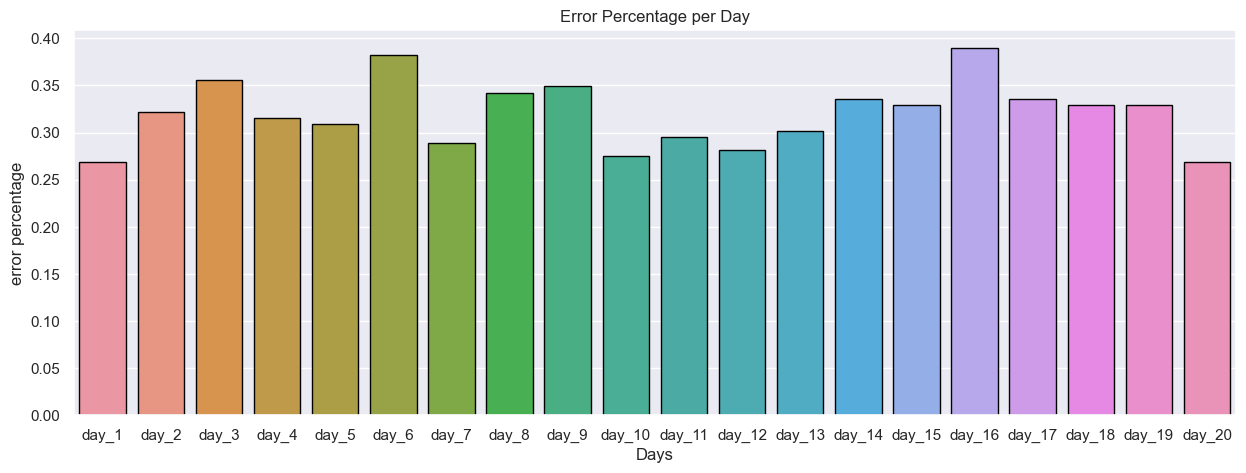

In [4]:
# calculate average error on all users per day
preds_error = preds_outcome.apply(lambda x: (x != labels[x.name]).sum() / len(x), axis=0)

# plot the error per day
p = sns.barplot(x=preds_error.index, y=preds_error.values, edgecolor='black')
p.set(title='Error Percentage per Day', ylabel='error percentage', xlabel='Days')
plt.show()

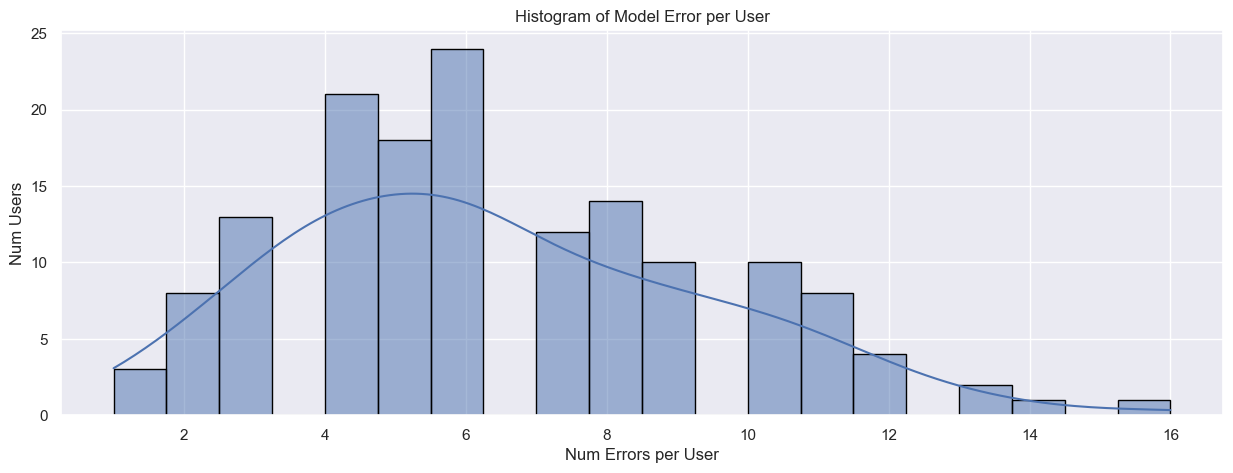

In [5]:
# calculate model error per user
preds_error_per_user = (preds_outcome != labels).sum(axis=1)

# histogram of model error per user
p = sns.histplot(preds_error_per_user, bins=20, kde=True, edgecolor='black')
p.set(title='Histogram of Model Error per User', xlabel='Num Errors per User', ylabel='Num Users')
plt.show()

In [6]:
# print the average error of the model on all users
mean_error = (preds_error_per_user/20).mean()
print(f'The mean error of the model is {mean_error}')

The mean error of the model is 0.3201342281879195


### Average user trust in the system

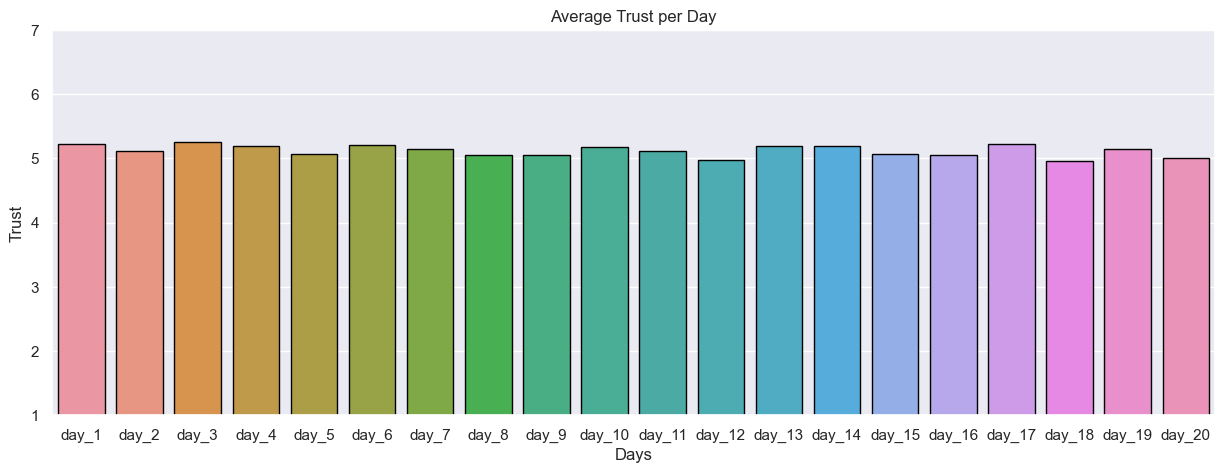

In [7]:
# calculate the average trust per day
last_rate_mean = last_rate.mean()

# plot the average trust per day
p = sns.barplot(x=last_rate.columns, y=last_rate_mean, edgecolor='black')
p.set(ylim=(1, 7), title='Average Trust per Day', ylabel='Trust', xlabel='Days')
plt.show()

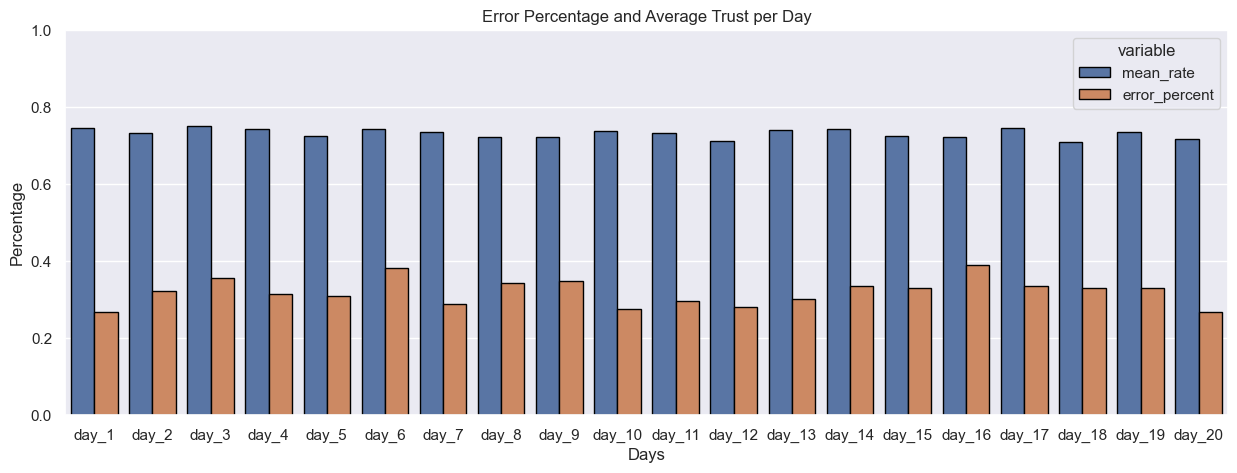

In [8]:
# melt a dataframe with the error and mean rating per day to plot them side by side
melted_df = pd.DataFrame({'day':preds_error.index, 'mean_rate': last_rate_mean.values/7, 'error_percent': preds_error.values})
melted_df = pd.melt(melted_df, id_vars=['day'], value_vars=['mean_rate', 'error_percent'])

# plot preds_error and last_rate_mean as bar plots side by side
p = sns.barplot(x='day', y='value', hue='variable', data=melted_df, edgecolor='black')
p.set(ylim=(0,1), title='Error Percentage and Average Trust per Day', ylabel='Percentage', xlabel='Days')
plt.show()

In [9]:
print('Correlation between error percentage and average trust per day:')
print(f"pearson: {last_rate_mean.corr(preds_error, method='pearson')}")

Correlation between error percentage and average trust per day:
pearson: 0.1009702181446363


### User actions according to system predictions

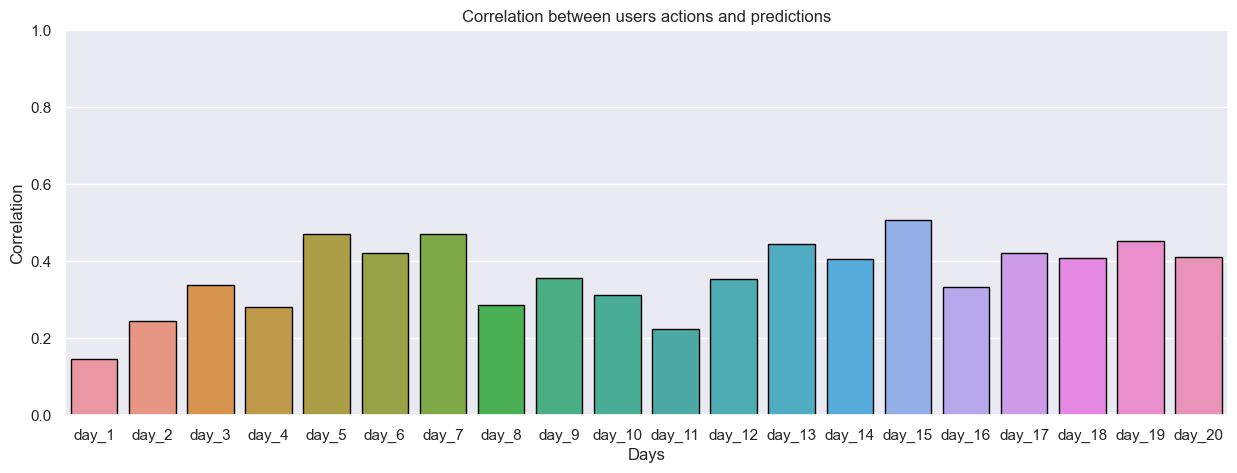

In [10]:
# plot correlation between preds and first_rate for every feature in bar plot
cor = preds.corrwith(first_rate, method='pearson')
p = sns.barplot(x=cor.index, y=cor.values, edgecolor='black')
p.set(ylim=(0,1), title='Correlation between users actions and predictions', ylabel='Correlation', xlabel='Days')
plt.show()

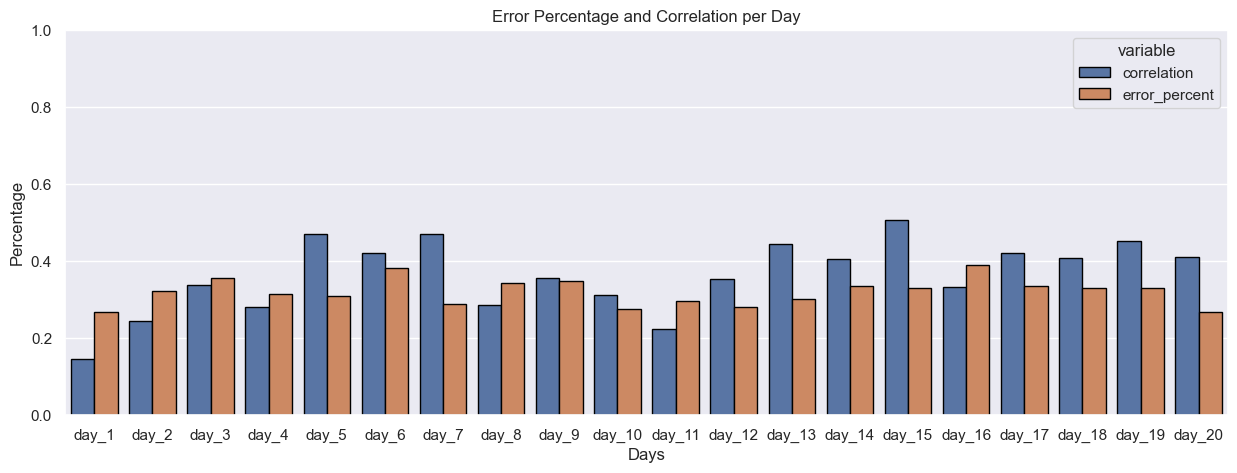

In [11]:
# melt a dataframe with the error and mean rating per day to plot them side by side
melted_df = pd.DataFrame({'day':preds_error.index, 'correlation': cor, 'error_percent': preds_error.values})
melted_df = pd.melt(melted_df, id_vars=['day'], value_vars=['correlation', 'error_percent'])

# plot preds_error and last_rate_mean as bar plots side by side
p = sns.barplot(x='day', y='value', hue='variable', data=melted_df, edgecolor='black')
p.set(ylim=(0,1), title='Error Percentage and Correlation per Day', ylabel='Percentage', xlabel='Days')
plt.show()

### Participants Errors

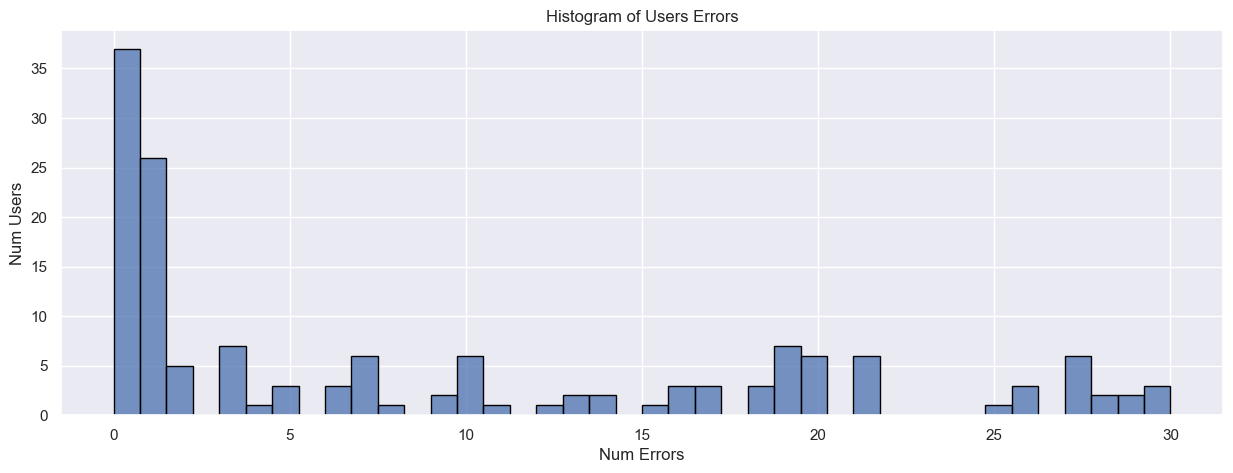

In [12]:
# calculate participants' errors
users_label_error = (labels != label_test).sum(axis=1)
users_pred_error = pred_test.apply(lambda x: (abs(x - preds.loc[x.name]) > 5).sum(), axis=1)
users_error = users_label_error + users_pred_error

# plot histogram of participants' error
p = sns.histplot(users_error, bins=40, edgecolor='black')
p.set(title='Histogram of Users Errors', xlabel='Num Errors', ylabel='Num Users')
plt.show()

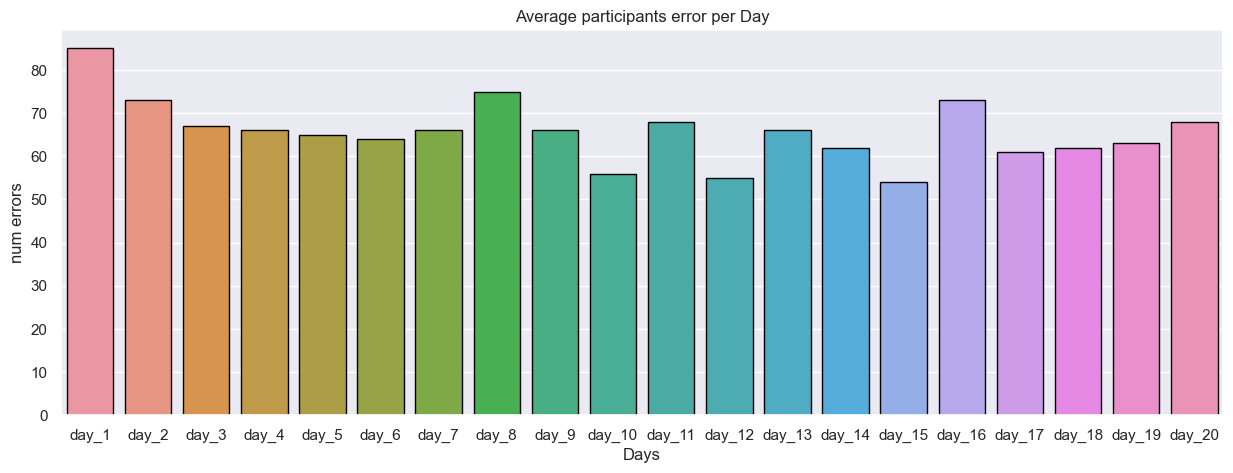

In [13]:
# calculate participants' errors per day
users_label_error_per_day = (labels != label_test).sum(axis=0)
users_pred_error_per_day = pred_test.apply(lambda x: (abs(x - preds.loc[x.name]) > 5), axis=1).sum(axis=0)
users_error_per_day = users_label_error_per_day+users_pred_error_per_day

# plot participants' error per day
p = sns.barplot(x=users_error_per_day.index, y=users_error_per_day.values, edgecolor='black')
p.set(title='Average participants error per Day', ylabel='num errors', xlabel='Days')
plt.show()

### Analysis of good participants

In [14]:
allowed_error = 20
good_users_idx = users_error[users_error < allowed_error].index
print(f'Number of users with less than {allowed_error} errors: {len(good_users_idx)}')

Number of users with less than 20 errors: 120


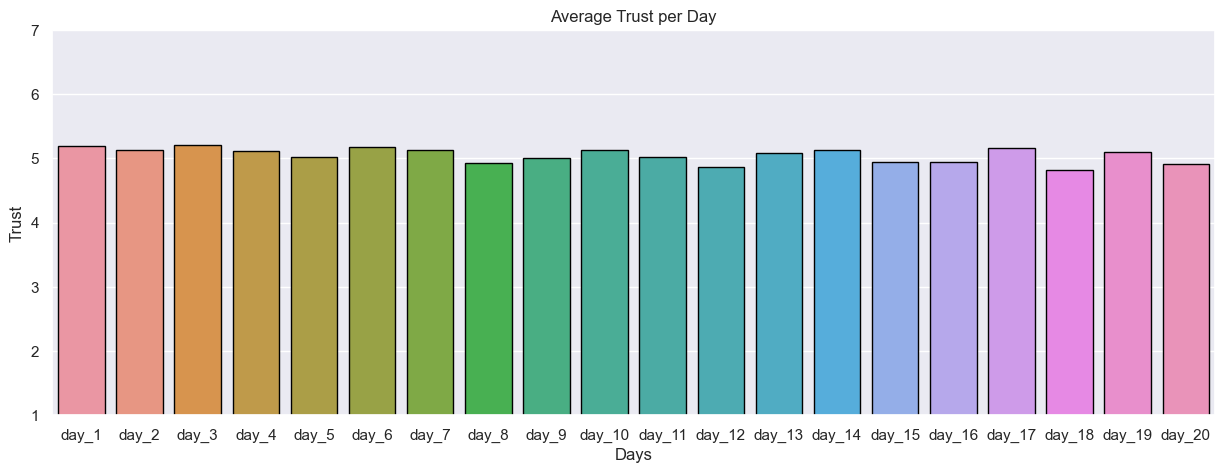

In [15]:
# calculate the average trust per day
last_rate_mean_good = last_rate.loc[good_users_idx].mean()

# plot the average trust per day
p = sns.barplot(x=last_rate.columns, y=last_rate_mean_good, edgecolor='black')
p.set(ylim=(1, 7), title='Average Trust per Day', ylabel='Trust', xlabel='Days')
plt.show()

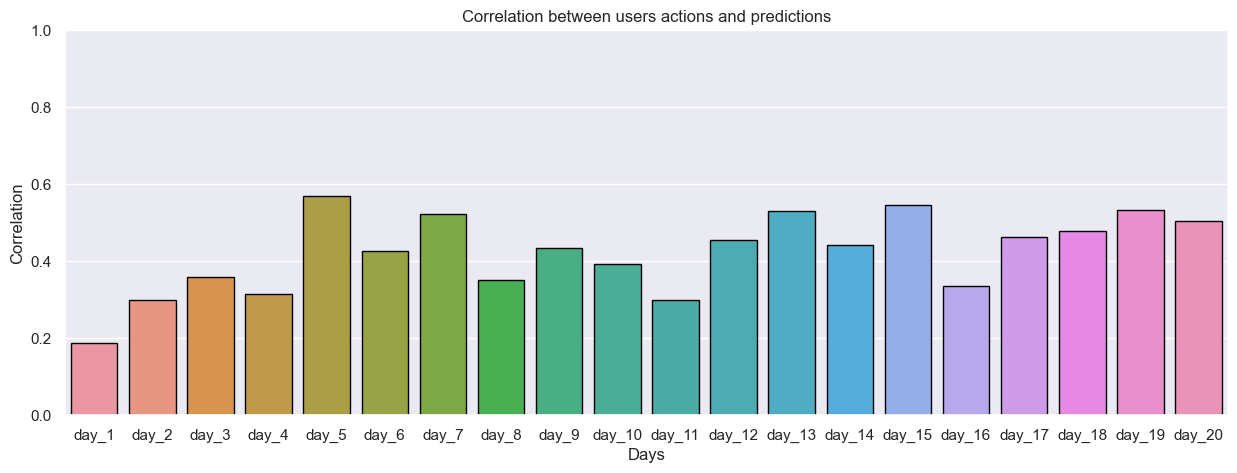

In [16]:
# calculate correlation between prediction and first_rate for every day
preds_good = preds.loc[good_users_idx]
first_rate_good = first_rate.loc[good_users_idx]
cor_good = preds_good.corrwith(first_rate_good, method='pearson')

#  plot correlation in bar plot
p = sns.barplot(x=cor_good.index, y=cor_good.values, edgecolor='black')
p.set(ylim=(0,1), title='Correlation between users actions and predictions', ylabel='Correlation', xlabel='Days')
plt.show()

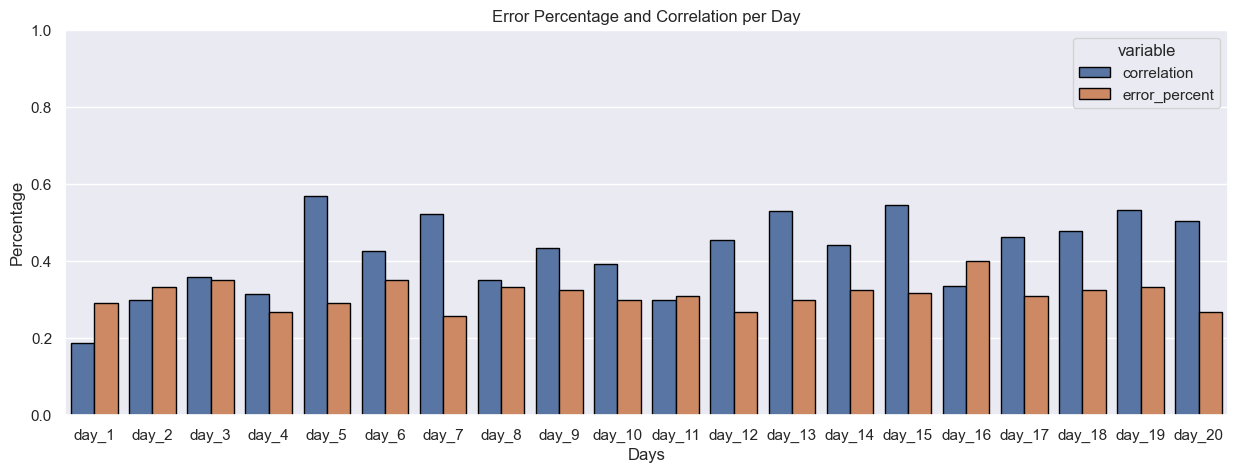

In [17]:
# calculate average error on good users per day
preds_outcome_good = preds_outcome.loc[good_users_idx]
labels_good = labels.loc[good_users_idx]
preds_error_good = preds_outcome_good.apply(lambda x: (x != labels_good[x.name]).sum() / len(x), axis=0)

# melt a dataframe with the error and mean rating per day to plot them side by side
melted_df = pd.DataFrame({'day':preds_error_good.index, 'correlation': cor_good, 'error_percent': preds_error_good.values})
melted_df = pd.melt(melted_df, id_vars=['day'], value_vars=['correlation', 'error_percent'])

# plot preds_error and last_rate_mean as bar plots side by side
p = sns.barplot(x='day', y='value', hue='variable', data=melted_df, edgecolor='black')
p.set(ylim=(0,1), title='Error Percentage and Correlation per Day', ylabel='Percentage', xlabel='Days')
plt.show()